**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## DATA PREPARATION & VISUALIZATION 

In [4]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### a)  Split your data into X and y:

In [6]:
train_x_a = train.drop(columns = ['label', 'Unnamed: 0'])
train_y = train[['label']]
test_x = test.drop(columns = ['label', 'Unnamed: 0'])
test_y = test[['label']]

### b)  Visualizing the data:

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#First i transformed my dataFrames to a numpy arrays.
train_x_a_numpy = pd.DataFrame(train_x_a).to_numpy()
train_y_numpy = pd.DataFrame(train_y).to_numpy()
#i added a target too because i will use it on the part D
def plot_image(row, target):
    image = target[row]
    digit_image = image.reshape(28,28)
    plt.imshow(digit_image, cmap = plt.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()
    
    
    
    

### c) Class visualization:

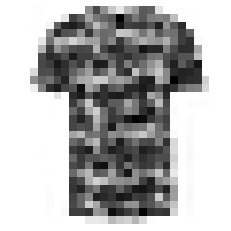

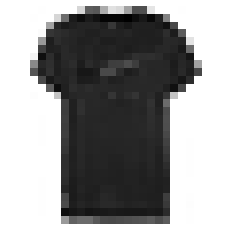

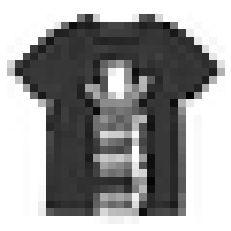

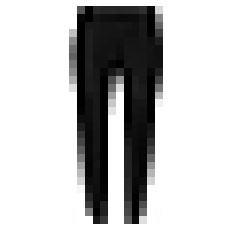

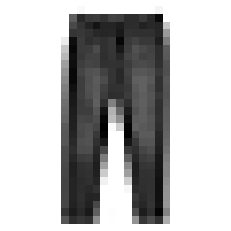

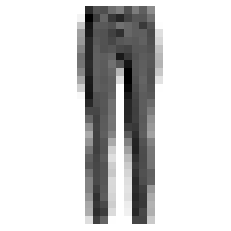

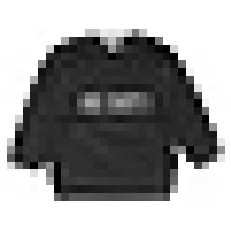

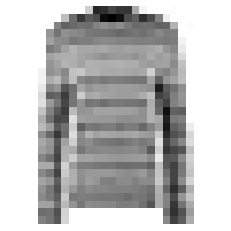

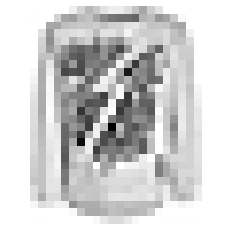

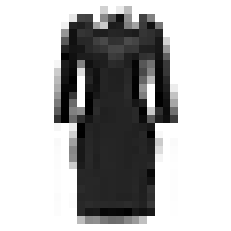

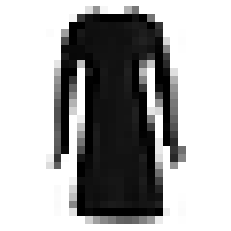

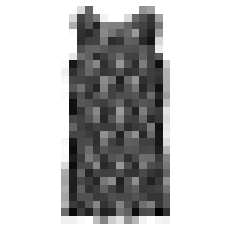

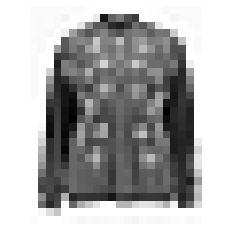

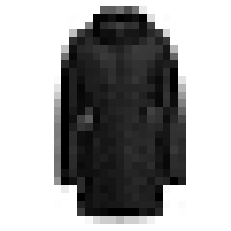

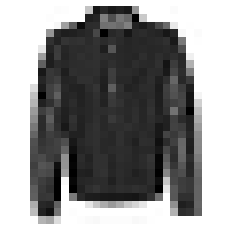

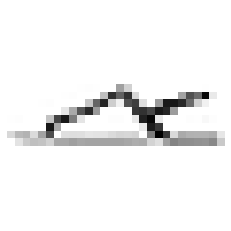

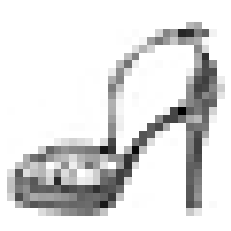

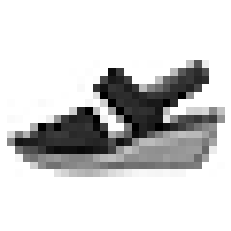

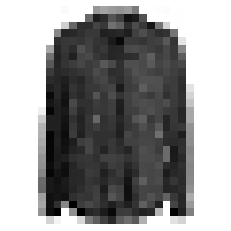

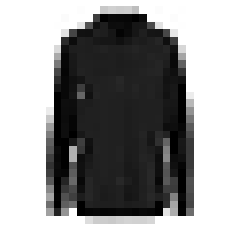

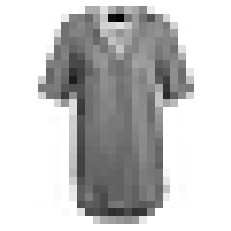

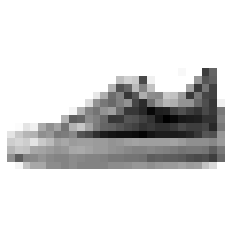

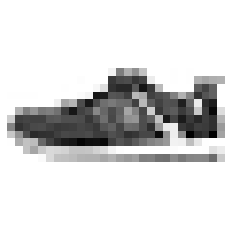

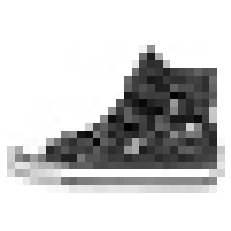

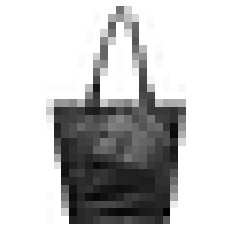

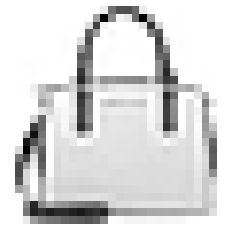

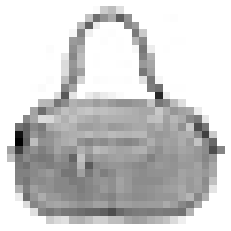

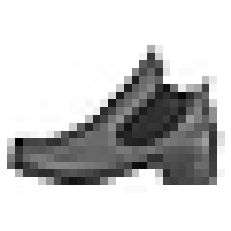

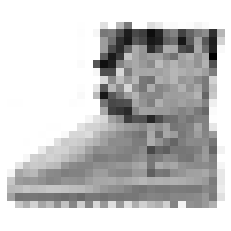

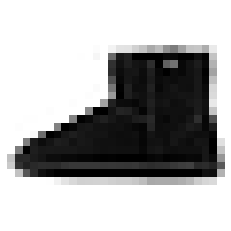

In [8]:
#getting the indexes of labels in here. 
label_0_indexes = (train_y.loc[train_y.label == 0].index.tolist())
label_1_indexes = (train_y.loc[train_y.label == 1].index.tolist())
label_2_indexes = (train_y.loc[train_y.label == 2].index.tolist())
label_3_indexes = (train_y.loc[train_y.label == 3].index.tolist())
label_4_indexes = (train_y.loc[train_y.label == 4].index.tolist())
label_5_indexes = (train_y.loc[train_y.label == 5].index.tolist())
label_6_indexes = (train_y.loc[train_y.label == 6].index.tolist())
label_7_indexes = (train_y.loc[train_y.label == 7].index.tolist())
label_8_indexes = (train_y.loc[train_y.label == 8].index.tolist())
label_9_indexes = (train_y.loc[train_y.label == 9].index.tolist())

#filling them as 3
label_0_3_instance = []
label_1_3_instance = []
label_2_3_instance = []
label_3_3_instance = []
label_4_3_instance = []
label_5_3_instance = []
label_6_3_instance = []
label_7_3_instance = []
label_8_3_instance = []
label_9_3_instance = []

#appending the lists with their label indexes
for i in range(3):
    label_0_3_instance.append(label_0_indexes[i])
    label_1_3_instance.append(label_1_indexes[i])
    label_2_3_instance.append(label_2_indexes[i])
    label_3_3_instance.append(label_3_indexes[i])
    label_4_3_instance.append(label_4_indexes[i])
    label_5_3_instance.append(label_5_indexes[i])
    label_6_3_instance.append(label_6_indexes[i])
    label_7_3_instance.append(label_7_indexes[i])
    label_8_3_instance.append(label_8_indexes[i])
    label_9_3_instance.append(label_9_indexes[i])

for i in label_0_3_instance:
    plot_image(i, train_x_a_numpy)
    
for i in label_1_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_2_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_3_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_4_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_5_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_6_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_7_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_8_3_instance:
    plot_image(i, train_x_a_numpy)

for i in label_9_3_instance:
    plot_image(i, train_x_a_numpy)

### d) Average visualization:

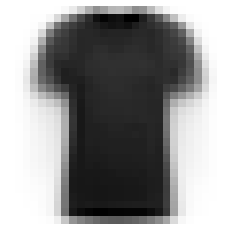

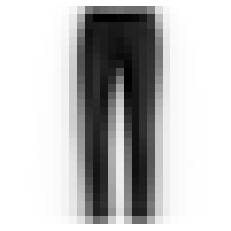

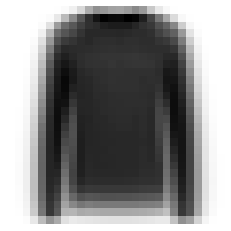

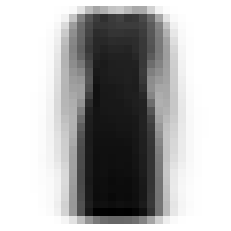

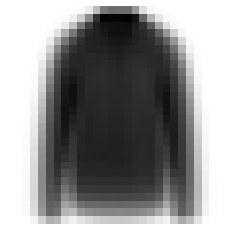

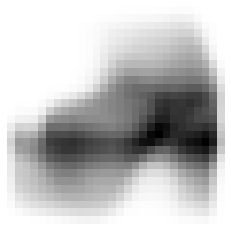

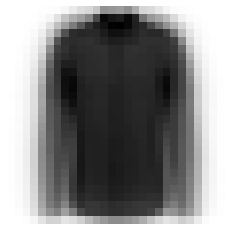

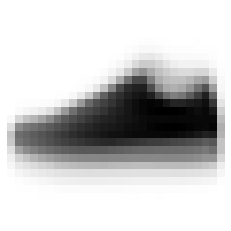

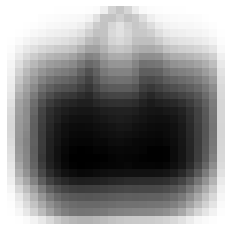

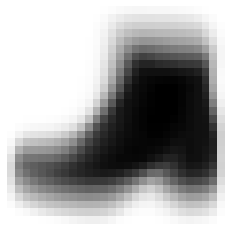

In [9]:
#i already got the indexes of each label from the train_y to get the data from train_x_a in previous part.

#now with the indexes i have, i am getting the mean for each label in my train_x_a data.
label_0_mean = train_x_a.loc[label_0_indexes].mean()
label_1_mean = train_x_a.loc[label_1_indexes].mean()
label_2_mean = train_x_a.loc[label_2_indexes].mean()
label_3_mean = train_x_a.loc[label_3_indexes].mean()
label_4_mean = train_x_a.loc[label_4_indexes].mean()
label_5_mean = train_x_a.loc[label_5_indexes].mean()
label_6_mean = train_x_a.loc[label_6_indexes].mean()
label_7_mean = train_x_a.loc[label_7_indexes].mean()
label_8_mean = train_x_a.loc[label_8_indexes].mean()
label_9_mean = train_x_a.loc[label_9_indexes].mean()

#filling them in a new DataFrame.
mean_of_classes = pd.DataFrame([label_0_mean,label_1_mean,label_2_mean,label_3_mean,label_4_mean,label_5_mean,label_6_mean,
                               label_7_mean,label_8_mean,label_9_mean])

#converting the DataFrame to numpy array to plot it.
mean_of_classes_numpy = pd.DataFrame(mean_of_classes).to_numpy()


for i in range(10):
    plot_image(i, mean_of_classes_numpy)


In [10]:
#Now, i am reducing the size of the data before the actual models.

##randomly sampling the dataframe
train_x_a = train_x_a.sample(frac=0.10, replace=False, random_state=1)
train_y = train_y.sample(frac=0.10, replace=False, random_state=1)
test_x = test_x.sample(frac=0.10, replace=False, random_state=1)
test_y = test_y.sample(frac=0.10, replace=False, random_state=1)


## BINARY CLASSIFICATION

### e) Binary transformation:

In [12]:
#replacing T-shirt/top, Pullover, Shirt, Trouser, Dress, or Coat to 1
#for training
#i already determined which labels blong to what by looking at the set. 1,2,3,4,6 are clothes
#5,7,8,9 are the others.


#copying the train_y
train_y_e = train_y.copy()
#Binary transformation of the 1,2,3,4,6 labels to 1
for i in range(7):
    if i == 0 or i == 5:
        continue
    else:
        train_y_e = train_y_e.replace(i, 1)
#Binary transformation of the 5,7,8,9 labels to 0
for i in range(5,10):
    if i == 6:
        continue
    else:
        train_y_e = train_y_e.replace(i, 0)

#copying the test.
test_y_e = test_y.copy()

#Binary transformation of the 1,2,3,4,6 labels to 1
for i in range(7):
    if i == 0 or i == 5:
        continue
    else:
        test_y_e = test_y_e.replace(i, 1)

#Binary transformation of the 5,7,8,9 labels to 0
for i in range(5,10):
    if i == 6:
        continue
    else:
        test_y_e = test_y_e.replace(i, 0)




### f) Binary Classification Model

In [14]:
#calling the logistic model, accuracy score, and cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#creating the logistic regression with default parameter to use it later.
log_model = LogisticRegression()
#doing the cross validation for the binary model.
scores = cross_val_score(log_model, train_x_a, train_y_e, scoring = "accuracy", cv = 5)
#getting the mean
mean_accuracy = scores.mean()
print("Mean accuracy is: ", mean_accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

Mean accuracy is:  0.9183453815149486


### g) Predict test data:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[223  27]
 [ 24 226]]
Accuracy score is: 0.898
Precision score is: 0.8932806324110671
Recall score is: 0.904
F1 score is : 0.8986083499005963


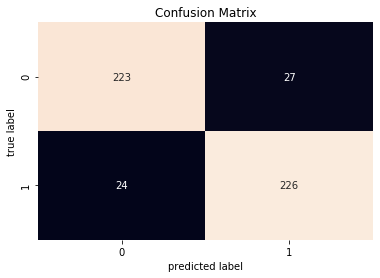

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import seaborn as sns

#I fitted the model, and used test_x to predict.
log_model.fit(train_x_a,train_y_e)
log_model_prediction = log_model.predict(test_x)

#here i am comparing the prediction with the actual.

#should i give a parameter as average: macro?
confusion_matrix_g = confusion_matrix(test_y_e, log_model_prediction)
precision_score_g = precision_score(test_y_e, log_model_prediction)
recall_score_g = recall_score(test_y_e, log_model_prediction)
f1_score_g = f1_score(test_y_e, log_model_prediction)
accuracy_score_g = accuracy_score(test_y_e, log_model_prediction)

#plotting
sns.heatmap(confusion_matrix_g, annot=True, fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel('predicted label')
plt.ylabel('true label');
print("Confusion matrix:\n", confusion_matrix_g)
print("Accuracy score is:",accuracy_score_g)
print("Precision score is:",precision_score_g)
print("Recall score is:", recall_score_g)
print("F1 score is :", f1_score_g)

# train the model
# plot confusion matrix
# print(accuracy, precision, recall, f1_score)

### h) Model evaluation:


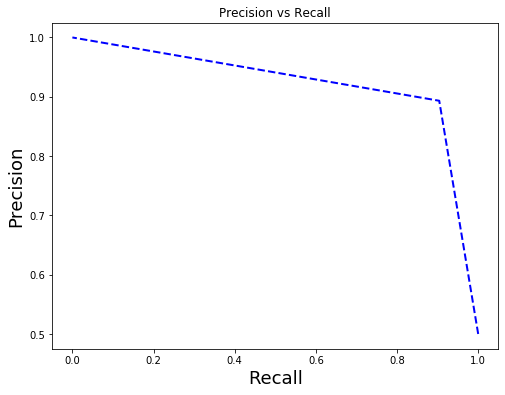

In [21]:
#importing predicison&recall and roc & auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

precisions, recalls, thresholds = precision_recall_curve(test_y_e, log_model_prediction)

#def the function to plot prec and recall
def plot_precision_recall_vs_threshold(precisions, recalls):
    plt.plot(recalls,  precisions, "b--", linewidth = 2) 
    plt.title("Precision vs Recall")
    plt.xlabel("Recall", fontsize= 18)
    plt.ylabel("Precision", fontsize = 18)

#plotting
plt.figure(figsize= (8,6))
plot_precision_recall_vs_threshold(precisions, recalls)
plt.show()



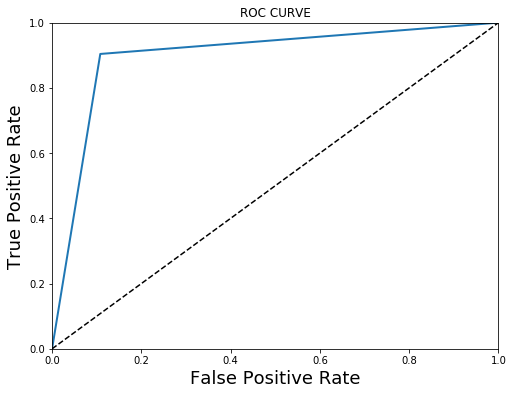

AUC Score is:  0.8979999999999999


In [22]:
#passing the actual data and my model's predictions.
fpr, tpr, thresholds = roc_curve(test_y_e, log_model_prediction)

#defining the function to plot.
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.title("ROC CURVE")
    plt.xlabel("False Positive Rate", fontsize = 18)
    plt.ylabel("True Positive Rate", fontsize = 18)
plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
plt.show()

#getting the auc score.
auc_score = roc_auc_score(test_y_e, log_model_prediction)

print("AUC Score is: ", auc_score)

### i) Learning curves:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

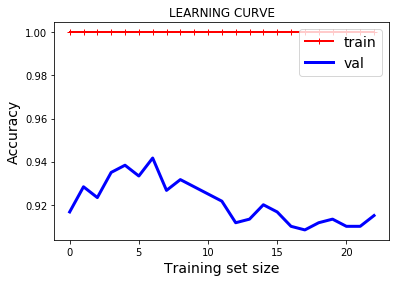

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#defining the function
def plot_learning_curves(model, X, y):
    #splitting the data.
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_accuracy, val_accuracy = [], []
    for m in range(100, len(X_train), 100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        #appending the accuracy scores to the empty lists.
        train_accuracy.append(accuracy_score(y_train_predict, y_train[:m]))
        val_accuracy.append(accuracy_score(y_val_predict, y_val))
        #print("The train accuracy at step :(", m, ") is: " ,train_accuracy)
        #print("The validation accuracy at step :(", m, ") is: ",val_accuracy)
    plt.plot((train_accuracy), "r-+", linewidth=2, label="train")
    plt.plot((val_accuracy), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.title("LEARNING CURVE")
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("Accuracy", fontsize=14)     
    
#creating the model and plotting.
plot_log_model = LogisticRegression()
plot_learning_curves(plot_log_model, train_x_a, train_y_e)

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### j) Training and cross validating logistic regression:

In [26]:
#3 fold Cross Validation on train_x_a and train_y
log_model_for_cv = LogisticRegression()
scores2 = cross_val_score(log_model_for_cv, train_x_a, train_y, scoring = "accuracy", cv = 3)
mean_accuracy2 = scores2.mean()
print("Mean accuracy is: ",mean_accuracy2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataCo

Mean accuracy is:  0.7770096950872558


### k) testing logistic regression:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test accuracy is: 0.734
Confusion matrix:
 [[28  0  5  2  2  0  9  0  1  0]
 [ 0 38  0  0  0  0  1  0  0  0]
 [ 2  1 36  1  6  0 12  0  0  0]
 [ 1  1  3 39  4  0  5  0  1  0]
 [ 0  0  6  4 36  0  6  0  0  0]
 [ 0  0  2  0  2 35  2  9  1  1]
 [10  0  5  0  3  0 27  0  2  0]
 [ 0  0  0  0  0  3  1 50  0  4]
 [ 1  0  2  0  3  2  1  2 37  0]
 [ 0  0  1  0  0  0  0  3  0 41]]


Text(33.0, 0.5, 'true label')

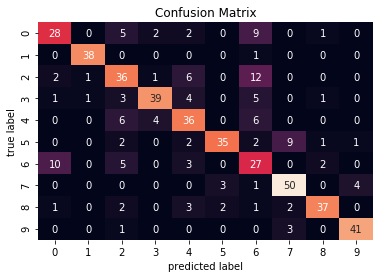

In [28]:
#log_model2 = LogisticRegression()
log_model_for_cv.fit(train_x_a, train_y)
log_model_2_predict = log_model_for_cv.predict(test_x)
score3 = accuracy_score(test_y, log_model_2_predict)

confusion_matrix_log_model = confusion_matrix(test_y, log_model_2_predict)

print("Test accuracy is:", score3)
print("Confusion matrix:\n", confusion_matrix_log_model)

sns.heatmap(confusion_matrix_log_model, annot=True, fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel('predicted label')
plt.ylabel('true label')

# fit model 
# test model
# print confusion matrix

## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [29]:
#importing gridsearch & svm, svc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
SVC_clf = svm.SVC()
#we put the parameters as in the assignment
param_grid = {
            'kernel': ['poly', 'rbf', 'linear'],
            'C': [0.1, 0.5, 1.0, 5.0, 10.0],
            'tol':[0.0001, 0.001, 0.1],
            'decision_function_shape': ['ovo', 'ovr'],
            }
grid_search = GridSearchCV(SVC_clf, param_grid,cv=5, scoring='accuracy')
grid_search.fit(train_x_a, train_y)
#this part we get the best parameter.
best_parameters = grid_search.best_params_


print("SVC best parameters: ", best_parameters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

SVC best parameters:  {'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'linear', 'tol': 0.0001}


### m)Testing the best model:

SVC best parameters:  {'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'linear', 'tol': 0.0001}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy is: 0.794
Confusion matrix: 
 [[33  0  3  1  0  0  8  0  2  0]
 [ 0 38  0  0  0  0  1  0  0  0]
 [ 2  0 44  1  5  0  5  0  1  0]
 [ 1  2  1 47  0  0  2  0  1  0]
 [ 1  0  8  3 32  0  8  0  0  0]
 [ 0  0  0  0  0 44  0  7  0  1]
 [12  0  4  0  5  0 25  0  1  0]
 [ 0  0  0  0  0  6  0 49  0  3]
 [ 1  0  0  0  1  2  0  2 42  0]
 [ 0  0  0  0  0  0  0  2  0 43]]


Text(33.0, 0.5, 'true label')

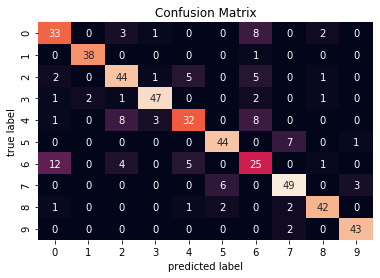

In [34]:
print("SVC best parameters: ", best_parameters)
#i set the best parameters.
#in here if i set the kernel by hand to a poly instead of the getting the best parameters from the gridsearch my accuracy
#slightly increases to 0.8. But i still used the ones i got from the GridSearch.
svclassifier = SVC(kernel='linear', C = 0.1, decision_function_shape = 'ovo', tol= 0.0001)
svclassifier.fit(train_x_a, train_y)

#predicting.
svm_model_predict = svclassifier.predict(test_x)
#getting the accuracy score
svm_score = accuracy_score(test_y, svm_model_predict)

#getting the confusion array to plot it to matrix
confusion_matrix_svm_model = confusion_matrix(test_y, svm_model_predict)

print("Test accuracy is:", svm_score)
print("Confusion matrix: \n", confusion_matrix_svm_model)
sns.heatmap(confusion_matrix_svm_model, annot=True, fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel('predicted label')
plt.ylabel('true label')

## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
#we put the parameters as in the assignment
param_grid2 = {
            'max_depth': [2, 4, 10],
            'min_samples_split': [2,3,4],
            }
decisiontree_search = GridSearchCV(decision_tree, param_grid2, cv=5, scoring='accuracy')
decisiontree_search.fit(train_x_a, train_y)
#this part we get the best parameter.
tree_best_parameters = decisiontree_search.best_params_


print("Decision tree best parameters: ", tree_best_parameters)

Decision tree best parameters:  {'max_depth': 10, 'min_samples_split': 2}


### o) Testing the best model:

Confusion matrix: 
 [[27  0  0  3  2  0 13  0  1  1]
 [ 0 37  0  2  0  0  0  0  0  0]
 [ 2  1 36  0  9  0  9  0  1  0]
 [ 0  2  1 42  6  0  3  0  0  0]
 [ 0  1  8  0 36  0  7  0  0  0]
 [ 0  0  0  0  0 47  0  3  2  0]
 [10  2  6  2  5  0 21  0  1  0]
 [ 0  0  0  0  0  8  0 45  1  4]
 [ 1  0  1  2  0  2  2  4 36  0]
 [ 0  0  0  0  0  0  0  6  0 39]]
Test accuracy is: 0.732


Text(33.0, 0.5, 'true label')

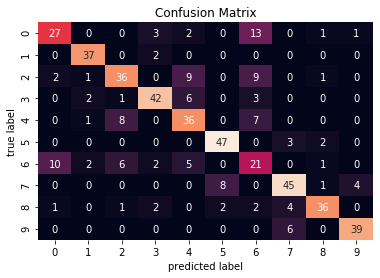

In [35]:
#putting the best parameters to decision tree
final_decision_tree = DecisionTreeClassifier(max_depth= 10 , min_samples_split = 4)
#fitting.
final_decision_tree.fit(train_x_a, train_y)
tree_predict = final_decision_tree.predict(test_x)

#getting the accuracy score
tree_score = accuracy_score(test_y, tree_predict)

#getting the confusion matrix array
confusion_matrix_decisiontree_model = confusion_matrix(test_y, tree_predict)
print("Confusion matrix: \n", confusion_matrix_decisiontree_model)

print("Test accuracy is:", tree_score)
#plotting it
sns.heatmap(confusion_matrix_decisiontree_model, annot=True, fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel('predicted label')
plt.ylabel('true label')